In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('CBB_Listings.csv')
df.head(5)

,listing_id,listing_heading,listing_type,listing_url,listing_first_date,days_on_market,dealer_id,dealer_name,dealer_street,dealer_city,...,wheelbase_from_vin,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,number_price_changes,price_history_delimited,distance_to_dealer,location_score,listing_dropoff_date
0,f5b663d2-4896-11ef-a15b-8b4423f1ff08,1987 IROC Z 350 Auto T-Tops,Active,https://www.kijiji.ca/v-cars-trucks/edmonton/1...,7/22/2024 0:00,9,11152931,David T's Camaro & Firebird Auto Center,10611 201 St NW,Edmonton,...,0.0,RWD,5.7L V8 TBI,A,Gas,0,"2024-07-22,11500,230860",9.84,5,NaN
1,a9f565e6-4712-11ef-a23f-79dc25c5e601,NaN,Sold,https://www.redlinemotors.ca/vehicle-details/1...,7/20/2024 0:00,4,11131329,Redlinemotors.Ca,14421 Mark Messier Trail,Edmonton,...,0.0,RWD,5.2L V8,A,Gas,0,"2024-07-20,8700,48905",8.30,5,7/24/2024 0:00
2,03d18c58-253a-11ef-8f33-8905b4a2f000,1989 Cadillac DeVille Sedan FWD,Active,https://www.sweetheartmotor.com/cars/used/1989...,6/7/2024 0:00,54,11161704,Gateway Auto & Rv Sales & Financing Ltd,5404 Gateway Blvd NW,Edmonton,...,0.0,FWD,4.5L V8 DI,A,Gas,0,"2024-06-07,6000,174640",5.71,4,NaN
3,2d12630b-460e-11ee-89c4-e5b3161d4741,1989 Cadillac DeVille Sedan FWD,Active,https://www.sweetheartmotor.com/cars/used/1989...,8/28/2023 0:00,338,11128265,Credit Angels,5404 Gateway Blvd NW,Edmonton,...,0.0,FWD,4.5L V8 DI,A,Gas,4,"2023-08-28,4500,174640:2023-09-13,5900,174640:...",5.71,5,NaN
4,53a8e550-47cd-11ef-8587-f926ecb61035,1989 Camaro IROC 350 Auto T-Top,Active,https://www.kijiji.ca/v-cars-trucks/edmonton/1...,7/21/2024 0:00,10,11152931,David T's Camaro & Firebird Auto Center,10611 201 St NW,Edmonton,...,0.0,RWD,5.7L V8 TBI,A,Gas,0,"2024-07-21,8500,288000",9.84,5,NaN


In [ ]:
print(df.shape)

(145114, 46)


In [ ]:
print(df.dtypes)

listing_id                  object
listing_heading             object
listing_type                object
listing_url                 object
listing_first_date          object
days_on_market               int64
dealer_id                    int64
dealer_name                 object
dealer_street               object
dealer_city                 object
dealer_province             object
dealer_postal_code          object
dealer_url                  object
dealer_email               float64
dealer_phone                object
dealer_type                 object
stock_type                  object
vehicle_id                   int64
vin                         object
uvc                          int64
mileage                      int64
price                        int64
msrp                         int64
model_year                   int64
make                        object
model                       object
series                      object
style                       object
certified           

In [ ]:
df = df.drop(columns=["listing_id", "listing_heading",  "listing_url", "listing_first_date", "days_on_market", "dealer_id", "dealer_name",
                      "dealer_street", "dealer_city", "dealer_province", "dealer_postal_code", "dealer_url", "dealer_email", "dealer_phone", "dealer_type",
                      "vehicle_id", "vin", "uvc", "series", "style", "has_leather", "has_navigation", "price_analysis",
                      "wheelbase_from_vin", "number_price_changes", "price_history_delimited",
                       "distance_to_dealer", "location_score", "listing_dropoff_date", "exterior_color",  "interior_color"])

In [ ]:
df.isnull().sum()

,0
listing_type,0
stock_type,0
mileage,0
price,0
msrp,0
model_year,0
make,0
model,0
certified,0
exterior_color_category,34947


In [ ]:
# replacing null values in exterior_color_category
df['exterior_color_category'] = df['exterior_color_category'].fillna(df['exterior_color_category'].mode()[0])

# replacing null values in interior_color_category
df['interior_color_category'] = df['interior_color_category'].fillna(df['interior_color_category'].mode()[0])

In [ ]:
df.isnull().sum()

,0
listing_type,0
stock_type,0
mileage,0
price,0
msrp,0
model_year,0
make,0
model,0
certified,0
exterior_color_category,0


In [ ]:
# Check for duplicate rows
print(df.duplicated().sum())

29776


In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Verify the dataset shape after removing duplicates
print("Dataset shape after removing duplicates:", df.shape)

Dataset shape after removing duplicates: (115338, 15)


In [ ]:
print(df.duplicated().sum())

0


Outliers detected in each column:
{'mileage': 3177, 'price': 2455, 'msrp': 2375, 'model_year': 4327, 'certified': 946}


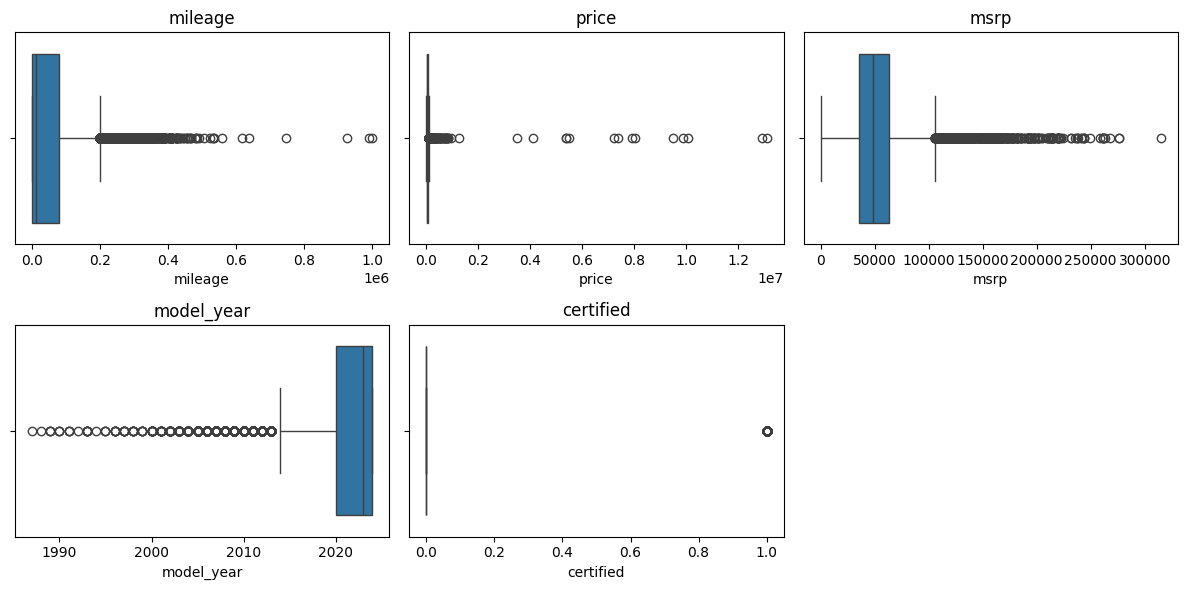

In [ ]:
# Select numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Count and display number of outliers per column
outlier_counts = {col: detect_outliers(df, col) for col in numeric_cols}
print("Outliers detected in each column:")
print(outlier_counts)

# Plot boxplots in a single figure
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, len(numeric_cols)//2 + 1, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
# Function to remove outliers using IQR
def remove_outliers(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    before = df.shape[0]
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    after = df.shape[0]
    print(f"{column}: Removed {before - after} outliers with threshold {threshold}")
    return df

# List of numerical columns to remove outliers
numeric_cols = ["mileage", "price", "msrp", "model_year", "certified"]

# Remove outliers for each numeric column
for col in numeric_cols:
    df = remove_outliers(df, col, threshold=1.5)

# Fix unrealistic model years (Ensures valid car production years)
df = df[(df["model_year"] >= 1900) & (df["model_year"] <= 2025)]

# Fix errors in certified column (Ensures only 0 or 1 values)
df = df[df["certified"].isin([0, 1])]

# Display final dataset shape
print("Final dataset shape after all outlier handling:", df.shape)

mileage: Removed 3177 outliers with threshold 1.5
price: Removed 2407 outliers with threshold 1.5
msrp: Removed 1033 outliers with threshold 1.5
model_year: Removed 2728 outliers with threshold 1.5
certified: Removed 922 outliers with threshold 1.5
Final dataset shape after all outlier handling: (105071, 15)


In [ ]:
# Check if outliers are actually present
for col in ["mileage", "price", "msrp","model_year","certified"]:
    print(f"Outliers in {col} using IQR 1.5:", detect_outliers(df, col))

Outliers in mileage using IQR 1.5: 916
Outliers in price using IQR 1.5: 519
Outliers in msrp using IQR 1.5: 312
Outliers in model_year using IQR 1.5: 0
Outliers in certified using IQR 1.5: 0


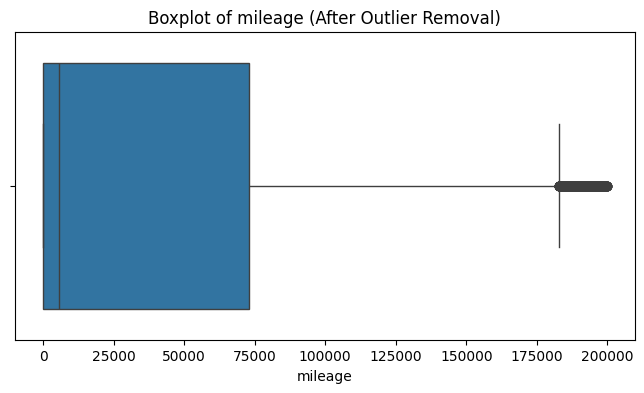

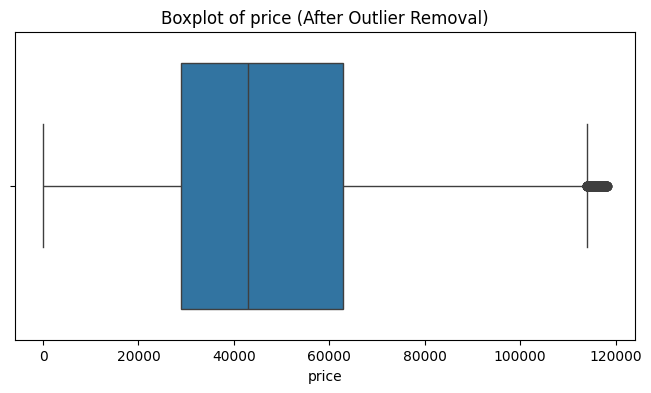

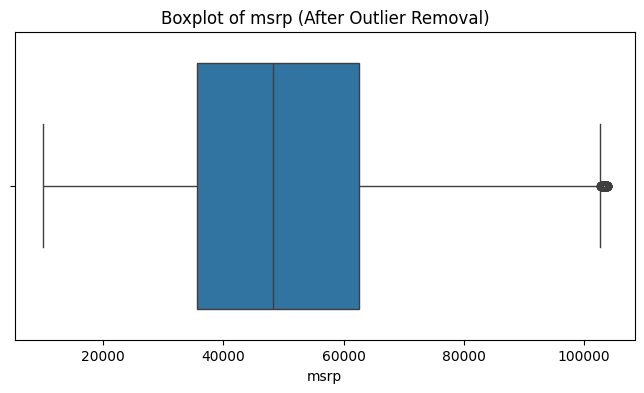

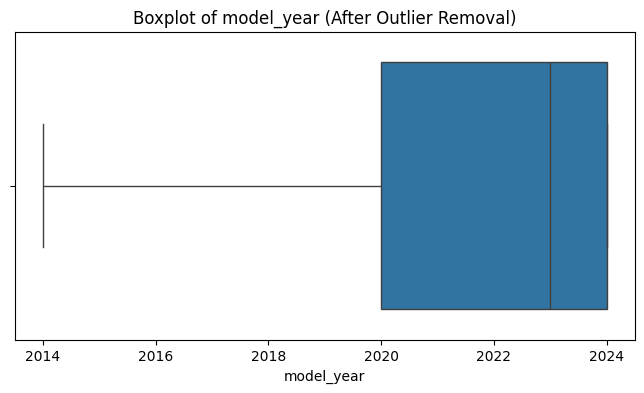

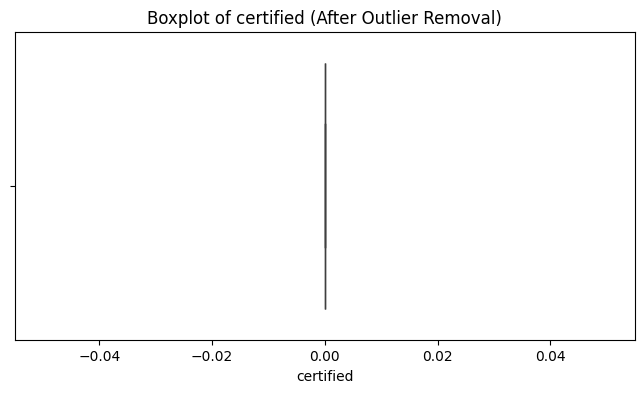

In [ ]:
# Replot boxplots to check if outliers are removed
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
    plt.show()

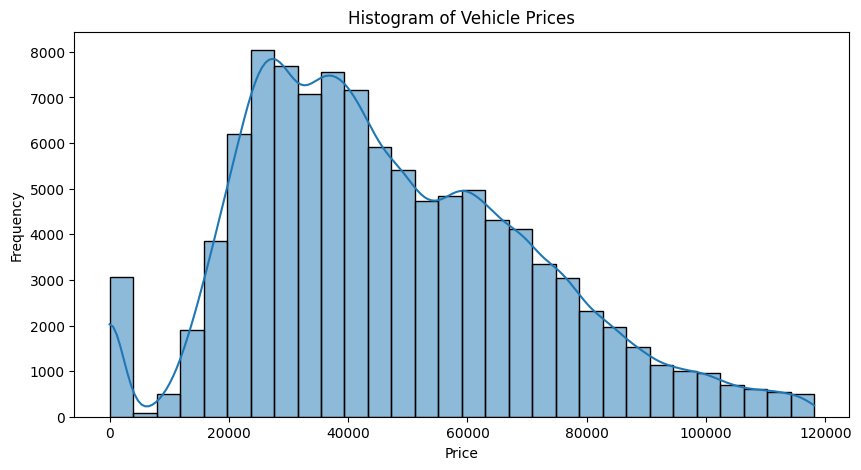

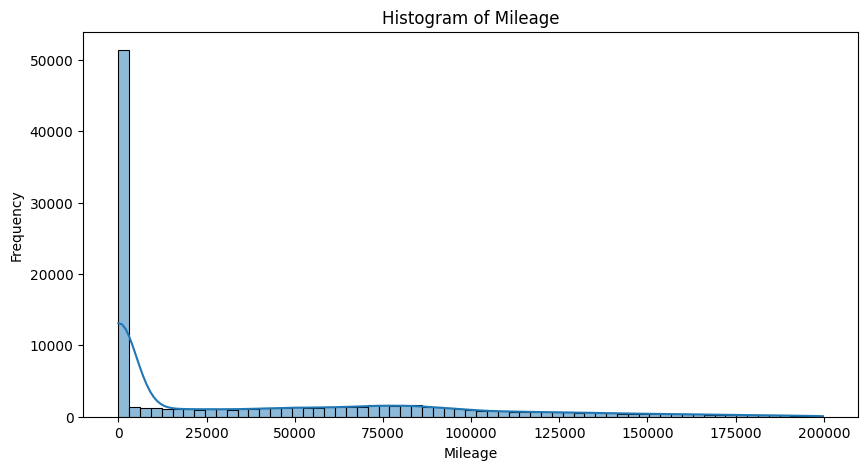

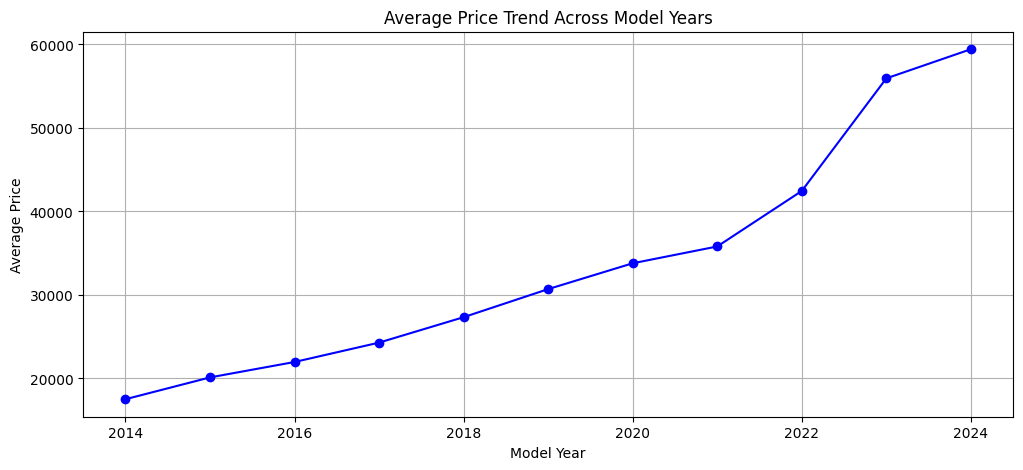

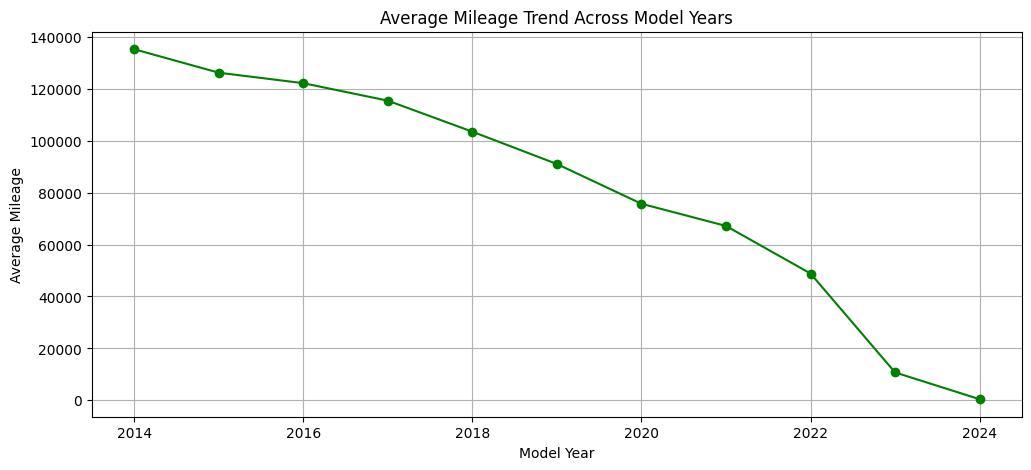

In [ ]:
# Histogram of Vehicle Prices
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Histogram of Vehicle Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Histogram of Mileage
plt.figure(figsize=(10, 5))
sns.histplot(df['mileage'] , kde=True)
plt.title("Histogram of Mileage")
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.show()

# Line Graph - Price Trend Across Vehicle Years
plt.figure(figsize=(12, 5))
df.groupby('model_year')['price'].mean().plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title("Average Price Trend Across Model Years")
plt.xlabel("Model Year")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()

# Line Graph - Mileage Trend Across Vehicle Years
plt.figure(figsize=(12, 5))
df.groupby('model_year')['mileage'].mean().plot(kind='line', marker='o', linestyle='-', color='green')
plt.title("Average Mileage Trend Across Model Years")
plt.xlabel("Model Year")
plt.ylabel("Average Mileage")
plt.grid(True)
plt.show()


In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Print categorical columns
print("Categorical Columns in the Dataset:")
print(categorical_cols.tolist())


Categorical Columns in the Dataset:
['listing_type', 'stock_type', 'make', 'model', 'exterior_color_category', 'interior_color_category', 'drivetrain_from_vin', 'engine_from_vin', 'transmission_from_vin', 'fuel_type_from_vin']


In [ ]:
# List of columns to check unique values for
columns_to_check = ['certified','listing_type', 'stock_type', 'make', 'model', 'exterior_color_category',
                    'interior_color_category', 'drivetrain_from_vin', 'engine_from_vin', 'transmission_from_vin', 'fuel_type_from_vin']


# Print unique values for each column
for col in columns_to_check:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("-" * 50)  # Adds a separator for readability

Unique values in certified:
[0]
--------------------------------------------------
Unique values in listing_type:
['Active' 'Sold']
--------------------------------------------------
Unique values in stock_type:
['USED' 'NEW']
--------------------------------------------------
Unique values in make:
['Acura' 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Fiat' 'Ford' 'GMC' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia'
 'Land Rover' 'Lexus' 'Lincoln' 'Maserati' 'Mazda' 'Mercedes-Benz' 'Mini'
 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Smart' 'Subaru' 'Toyota'
 'Volkswagen' 'Alfa Romeo' 'Tesla' 'Volvo' 'Scion' 'Genesis' 'Polestar'
 'Fisker']
--------------------------------------------------
Unique values in model:
['MDX' 'RDX' 'RLX' 'TL' 'A4' 'A5' 'A6' 'Q5' 'Q7' 'S5' 'S6' 'S7' '3-Series'
 '4-Series' '5-Series' 'X1' 'X3' 'X5' 'X6' 'Enclave' 'Encore' 'Verano'
 'ATS' 'CTS Sedan' 'Escalade' 'SRX' 'Camaro' 'Corvette' 'Cruze' 'Equinox'
 'Express Cargo' 'Impala' 'Silverado 1

In [ ]:
# Check frequency of each value in the column
print(df["transmission_from_vin"].value_counts())

transmission_from_vin
A    102484
M      2566
7        19
6         2
Name: count, dtype: int64


In [ ]:
# Find the most common valid transmission type (A or M)
most_common_transmission = df[df["transmission_from_vin"].isin(["A", "M"])]["transmission_from_vin"].mode()[0]

# Replace '6' and '7' with the most common valid value
df["transmission_from_vin"] = df["transmission_from_vin"].replace({"6": most_common_transmission, "7": most_common_transmission})

# Check updated unique values
print(df["transmission_from_vin"].unique())

['A' 'M']


In [ ]:
# Define target variable (y) and feature set (X)
X = df.drop(columns=['price'])  # Dropping target variable
y = df['price']  # Target variable

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dataset shapes
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (84056, 14) (84056,)
Testing set size: (21015, 14) (21015,)


In [ ]:
print(X_train.columns)
print(X_test.columns)

Index(['listing_type', 'stock_type', 'mileage', 'msrp', 'model_year', 'make',
       'model', 'certified', 'exterior_color_category',
       'interior_color_category', 'drivetrain_from_vin', 'engine_from_vin',
       'transmission_from_vin', 'fuel_type_from_vin'],
      dtype='object')
Index(['listing_type', 'stock_type', 'mileage', 'msrp', 'model_year', 'make',
       'model', 'certified', 'exterior_color_category',
       'interior_color_category', 'drivetrain_from_vin', 'engine_from_vin',
       'transmission_from_vin', 'fuel_type_from_vin'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for Binary Columns (2 unique values)
for col in ["transmission_from_vin", "stock_type", "listing_type"]:
    X[col] = LabelEncoder().fit_transform(X[col])

# Ordinal Encoding for `drivetrain_from_vin` (Fixing the warning)
drivetrain_mapping = {'FWD': 0, 'RWD': 1, 'AWD': 2, '4WD': 3}
X["drivetrain_from_vin"] = X["drivetrain_from_vin"].replace(drivetrain_mapping).astype(int)

# Label Encoding for `fuel_type_from_vin`
X["fuel_type_from_vin"] = LabelEncoder().fit_transform(X["fuel_type_from_vin"])

# Label Encoding for High-Cardinality Columns
for col in ["engine_from_vin", "exterior_color_category", "interior_color_category", "model", "make"]:
    X[col] = LabelEncoder().fit_transform(X[col])

# Check if all categorical columns are converted to numerical
print(X.dtypes)

listing_type               int64
stock_type                 int64
mileage                    int64
msrp                       int64
model_year                 int64
make                       int64
model                      int64
certified                  int64
exterior_color_category    int64
interior_color_category    int64
drivetrain_from_vin        int64
engine_from_vin            int64
transmission_from_vin      int64
fuel_type_from_vin         int64
dtype: object


<ipython-input-24-47ebad4bf1e3>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["drivetrain_from_vin"] = X["drivetrain_from_vin"].replace(drivetrain_mapping).astype(int)  # ✅ FIXED


In [ ]:
# from sklearn.preprocessing import StandardScaler
# # Initialize StandardScaler
# scaler = StandardScaler()

# # Fit & Transform on training data
# X_train_scaled = scaler.fit_transform(X_train_encoded)

# # Transform test data
# X_test_scaled = scaler.transform(X_test_encoded)
# #
# # Convert back to DataFrame
# X_train_scaled = pd.DataFrame(X_train_scaled)
# X_test_scaled = pd.DataFrame(X_test_scaled)

# print("X_train shape after scaling:", X_train_scaled.shape)
# print("X_test shape after scaling:", X_test_scaled.shape)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure dataset is properly split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Linear Regression model
linear_regression_model = LinearRegression()

# Train the model on training data
linear_regression_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = linear_regression_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)


# Print evaluation metrics
print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.4f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 6696.43
Mean Squared Error (MSE): 139685542.00
Root Mean Squared Error (RMSE): 11818.86
R-squared Score (R²): 0.7570


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode any remaining categorical columns
label_encoders = {}  # Store encoders for each column

for col in X_train.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()  # Create a new LabelEncoder for each column
    X_train[col] = label_encoders[col].fit_transform(X_train[col])  # Fit & transform training data
    X_test[col] = label_encoders[col].transform(X_test[col])  # Only transform test data (avoid unseen errors)

# Train the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_regression_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print results
print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.4f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 6696.43
Mean Squared Error (MSE): 139685542.00
Root Mean Squared Error (RMSE): 11818.86
R-squared Score (R²): 0.7570


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Instantiate Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Compute RMSE and R² Score
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Print results
print(f"Random Forest R² Score: {r2_rf:.4f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")


Random Forest R² Score: 0.8141
Random Forest RMSE: 10336.97


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>